In [1]:
import matplotlib.pyplot as plt

# 10Mbps 最慢节点的连接速率
# 10*2 服务器到互联网速率
# 10*4 交换机到互联网的速率

# 补丁元信息数据量 39041 bytes，相比模型参数量可以被忽略。

# |模型类型|参数数量| bytes |
# | --- | --- | --- |
# | 100% | 134,300,362 | 537,201,448 |
# | 75% | 75,554,074 | 302,216,296 |
# | 56.25% | 42,506,758 | 170,027,032 |
# | 42.19% | 23,915,746 | 95,662,984 |

# model_size = [537201448, 302216296, 170027032, 95662984]

model_size = [6673960, 3762856, 2123174, 1199724]

s3_patch_list = [(5.94, 6.94), (8.71, 12.47), (14.23, 23.52), (25.28, 45.62), (47.38, 89.82)]
s3_nopatch_list = [(8.49, 6.44), (11.25, 11.97), (16.78, 23.02), (27.83, 45.12), (49.93, 89.32)]
tcp_list = [(6.03, 6.15), (11.55, 11.87), (22.62, 23.72), (44.78, 46.15), (88.92, 93.18)]

In [2]:
model_elements = [i / 4 for i in model_size]
model_avg_element = sum(model_elements) / len(model_elements)

In [3]:
# 不剪枝 实验测得数值
# switchfl
# 4 8 16 32 64
switchfl_speed = {
    "4": (4 * model_avg_element / 5.603, 4 * model_avg_element / 5.745),
    "8": (8 * model_avg_element / 5.716, 8 * model_avg_element / 5.995),
    "16": (16 * model_avg_element / 5.919, 16 * model_avg_element / 6.150),
    "32": (32 * model_avg_element / 6.128, 32 * model_avg_element / 6.782),
    "64": (64 * model_avg_element / 6.894, 64 * model_avg_element / 9.173)
}

In [4]:
# tcp
tcp_speed = {
    "4": (4 * model_avg_element / tcp_list[0][0], 4 * model_avg_element / tcp_list[0][1]),
    "8": (8 * model_avg_element / tcp_list[1][0], 8 * model_avg_element / tcp_list[1][1]),
    "16": (16 * model_avg_element / tcp_list[2][0], 16 * model_avg_element / tcp_list[2][1]),
    "32": (32 * model_avg_element / tcp_list[3][0], 32 * model_avg_element / tcp_list[3][1]),
    "64": (64 * model_avg_element / tcp_list[4][0], 64 * model_avg_element / tcp_list[4][1])
}

In [5]:
# s3_patch
s3_patch_speed = {
    "4": (4 * model_avg_element / s3_patch_list[0][0], 4 * model_avg_element / s3_patch_list[0][1]),
    "8": (8 * model_avg_element / s3_patch_list[1][0], 8 * model_avg_element / s3_patch_list[1][1]),
    "16": (16 * model_avg_element / s3_patch_list[2][0], 16 * model_avg_element / s3_patch_list[2][1]),
    "32": (32 * model_avg_element / s3_patch_list[3][0], 32 * model_avg_element / s3_patch_list[3][1]),
    "64": (64 * model_avg_element / s3_patch_list[4][0], 64 * model_avg_element / s3_patch_list[4][1])
}

In [6]:
# s3_nopatch
s3_nopatch_speed = {
    "4": (4 * model_avg_element / s3_nopatch_list[0][0], 4 * model_avg_element / s3_nopatch_list[0][1]),
    "8": (8 * model_avg_element / s3_nopatch_list[1][0], 8 * model_avg_element / s3_nopatch_list[1][1]),
    "16": (16 * model_avg_element / s3_nopatch_list[2][0], 16 * model_avg_element / s3_nopatch_list[2][1]),
    "32": (32 * model_avg_element / s3_nopatch_list[3][0], 32 * model_avg_element / s3_nopatch_list[3][1]),
    "64": (64 * model_avg_element / s3_nopatch_list[4][0], 64 * model_avg_element / s3_nopatch_list[4][1])
}

tcp vs s3 1.4079601990049753
sfl vs s3patch 6.872642877864811
sfl vs tcp 12.898172323759791
s3patch vs s3 1.429292929292929
sfl 16 vs 8 1.9314073323196488
sfl 32 vs 16 1.931788511749347
sfl 64 vs 32 1.777777777777778
s3patch 16 vs 8 1.2241742796907942
s3patch 64 vs 32 1.0671169269734064
tcp 16 vs 8 1.0212201591511936
tcp 64 vs 32 1.0071974808816915


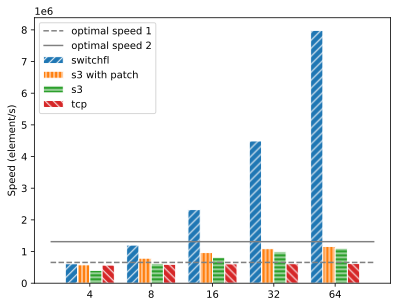

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

# 下发速度
width = 0.2
groups = ["4", "8", "16", "32", "64"]
x1 = np.arange(len(groups))
x2 = x1 + width


plt.bar(x1, [switchfl_speed[key][0] for key in groups], width=width, label="switchfl", hatch='///', edgecolor='white')
plt.bar(x1 + width, [s3_patch_speed[key][0] for key in groups], width=width, label="s3 with patch", hatch='|||', edgecolor='white')
plt.bar(x1 + width * 2, [s3_nopatch_speed[key][0] for key in groups], width=width, label="s3", hatch='---', edgecolor='white')
plt.bar(x1 + width *3 , [tcp_speed[key][0] for key in groups], width=width, label="tcp", hatch='\\\\\\', edgecolor='white')

print("tcp vs s3", tcp_speed["4"][0] / s3_nopatch_speed["4"][0])
print("sfl vs s3patch", switchfl_speed["64"][0] / s3_patch_speed["64"][0])
print("sfl vs tcp", switchfl_speed["64"][0] / tcp_speed["64"][0])
print("s3patch vs s3", s3_patch_speed["4"][0] / s3_nopatch_speed["4"][0])
print("sfl 16 vs 8", switchfl_speed["16"][0] / switchfl_speed["8"][0])
print("sfl 32 vs 16", switchfl_speed["32"][0] / switchfl_speed["16"][0])
print("sfl 64 vs 32", switchfl_speed["64"][0] / switchfl_speed["32"][0])
print("s3patch 16 vs 8", s3_patch_speed["16"][0] / s3_patch_speed["8"][0])
print("s3patch 64 vs 32", s3_patch_speed["64"][0] / s3_patch_speed["32"][0])
print("tcp 16 vs 8", tcp_speed["16"][0] / tcp_speed["8"][0])
print("tcp 64 vs 32", tcp_speed["64"][0] / tcp_speed["32"][0])
# 设置 x 轴刻度标签
plt.xticks(x1 + 3*width/2, groups)

xmin, xmax = plt.xlim()
# 参数服务器带宽瓶颈
plt.hlines(y=655360, color='gray', linestyle='dashed', xmin=xmin, xmax=xmax, label="optimal speed 1")

# 交换机上连瓶颈
plt.hlines(y=1310720, color='gray', linestyle='solid', xmin=xmin, xmax=xmax, label="optimal speed 2")

# plt.title('')
plt.legend()
plt.ylabel('Speed (element/s)')
plt.show()


tcp vs s3 1.0471544715447152
sfl vs s3patch 1.2080069625761534
sfl vs tcp 10.15807260438243
s3patch vs s3 0.9279538904899134
sfl 16 vs 8 1.949593495934959
sfl 32 vs 16 1.8136242996166325
sfl 64 vs 32 1.4786874523056799
s3patch 16 vs 8 1.060374149659864
s3patch 64 vs 32 1.0158093965709196
s3patch 64 vs 8 1.1106657759964376
tcp 16 vs 8 1.0008431703204048
tcp 64 vs 32 0.9905559132861126
tcp 64 vs 8 1.0191028117621805


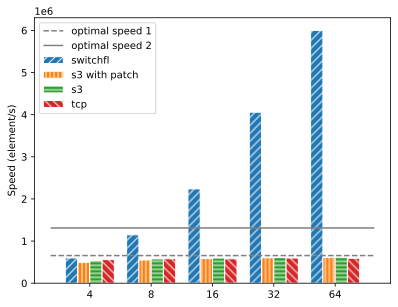

In [8]:
# 聚合速度
width = 0.2
groups = ["4", "8", "16", "32", "64"]
x1 = np.arange(len(groups))
x2 = x1 + width


plt.bar(x1, [switchfl_speed[key][1] for key in groups], width=width, label="switchfl", hatch='///', edgecolor='white')
plt.bar(x1 + width, [s3_patch_speed[key][1] for key in groups], width=width, label="s3 with patch", hatch='|||', edgecolor='white')
plt.bar(x1 + width * 2, [s3_nopatch_speed[key][1] for key in groups], width=width, label="s3", hatch='---', edgecolor='white')
plt.bar(x1 + width *3 , [tcp_speed[key][1] for key in groups], width=width, label="tcp", hatch='\\\\\\', edgecolor='white')

print("tcp vs s3", tcp_speed["4"][1] / s3_nopatch_speed["4"][1])
print("sfl vs s3patch", switchfl_speed["4"][1] / s3_patch_speed["4"][1])
print("sfl vs tcp", switchfl_speed["64"][1] / tcp_speed["64"][1])
print("s3patch vs s3", s3_patch_speed["4"][1] / s3_nopatch_speed["4"][1])
print("sfl 16 vs 8", switchfl_speed["16"][1] / switchfl_speed["8"][1])
print("sfl 32 vs 16", switchfl_speed["32"][1] / switchfl_speed["16"][1])
print("sfl 64 vs 32", switchfl_speed["64"][1] / switchfl_speed["32"][1])
print("s3patch 16 vs 8", s3_patch_speed["16"][1] / s3_patch_speed["8"][1])
print("s3patch 64 vs 32", s3_patch_speed["64"][1] / s3_patch_speed["32"][1])
print("s3patch 64 vs 8", s3_patch_speed["64"][1] / s3_patch_speed["8"][1])
print("tcp 16 vs 8", tcp_speed["16"][1] / tcp_speed["8"][1])
print("tcp 64 vs 32", tcp_speed["64"][1] / tcp_speed["32"][1])
print("tcp 64 vs 8", tcp_speed["64"][1] / tcp_speed["8"][1])

# 设置 x 轴刻度标签
plt.xticks(x1 + 3*width/2, groups)

xmin, xmax = plt.xlim()
# 参数服务器带宽瓶颈
plt.hlines(y=655360, color='gray', linestyle='dashed', xmin=xmin, xmax=xmax, label="optimal speed 1")

# 交换机上连瓶颈
plt.hlines(y=1310720, color='gray', linestyle='solid', xmin=xmin, xmax=xmax, label="optimal speed 2")


# plt.title('')
plt.legend()
plt.ylabel('Speed (element/s)')
plt.show()

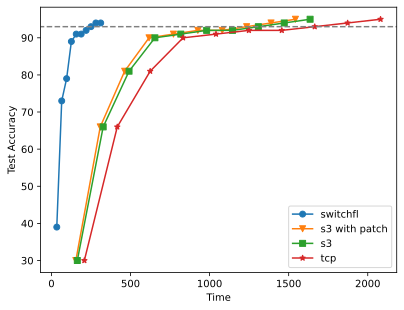

sfl vs s3patch 0.202613754213119
sfl vs s3 0.19112962396820543
sfl vs tcp 0.15022707612456748
sfl vs tcp 6.656589649463759


In [9]:
train_acc = [39, 73, 79, 89, 91, 91, 92, 93, 94, 94]
tcp_train_acc = [30, 66, 81, 90, 91, 92, 92, 93, 94, 95]
switchfl_tarin_time = [33.753, 64.922, 95.947, 126.01, 156.756, 188.129, 219.26, 250.074, 280.849, 311.51]
s3_patch_time = [i * (137.28 + 17) for i in range(1, 11)]
s3_no_patch_time = [i * (146.55 + 17) for i in range(1, 11)]
tcp_train_time = [i * (191.08 + 17) for i in range(1, 11)]


plt.plot(switchfl_tarin_time, train_acc, marker="o", linestyle="-", label="switchfl")
plt.plot(s3_patch_time, tcp_train_acc, marker="v", linestyle="-", label="s3 with patch")
plt.plot(s3_no_patch_time, tcp_train_acc, marker="s", linestyle="-", label="s3")
plt.plot(tcp_train_time, tcp_train_acc, marker="*", linestyle="-", label="tcp")
plt.axhline(y=93, color='gray', linestyle='--', xmin=plt.xlim()[0], xmax=plt.xlim()[1])

plt.legend(loc="lower right")
plt.xlabel('Time')
plt.ylabel('Test Accuracy')
plt.show()

print("sfl vs s3patch",  switchfl_tarin_time[7]/ s3_patch_time[7])
print("sfl vs s3",  switchfl_tarin_time[7] / s3_no_patch_time[7])
print("sfl vs tcp", switchfl_tarin_time[7] / tcp_train_time[7] )
print("sfl vs tcp", tcp_train_time[7] / switchfl_tarin_time[7] )

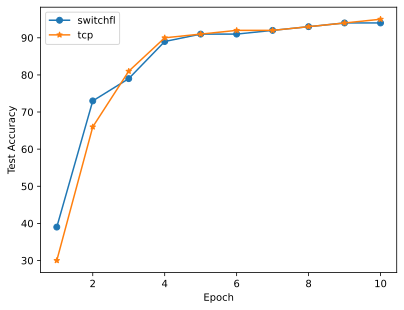

In [10]:
plt.plot(range(1, 1 + 10), train_acc, marker="o", linestyle="-", label="switchfl")
plt.plot(range(1, 1 + 10), tcp_train_acc, marker="*", linestyle="-", label="tcp")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.show()